<a href="https://colab.research.google.com/github/nichakornchaisuwan/Project_Boneage/blob/main/Model_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) # เป็น library ในการจัดการ dataframe

In [3]:
# Define relevant variables for the ML task
START_EPOCH=0
NUM_EPOCHS=60
LR=0.0001
PATIENCE=2
BATCH_SIZE=20
NUM_WORKERS=0
NUM_GPUS=1
GPUS=0

In [4]:
# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่าMounted at /content/drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์

In [7]:
path = '/content/drive/My Drive/Project_Boneage'  # ชี้ว่า data เราอยู่โฟล์เดอร์ไหน

In [8]:
#loading dataframes # เอาที่อยู่ของไฟล์เชื่อมกับที่อยู่ของไฟล์เรา โดยกำหนดชื่่อไฟล์ที่เราต้องการ
train_path = os.path.join(path,'train.csv')
train_dataset = pd.read_csv(train_path)
validation_path = os.path.join(path,'validation.csv')
validation_dataset = pd.read_csv(validation_path)
test_path = os.path.join(path,'boneage-test-dataset.csv')
test_dataset = pd.read_csv(test_path)

In [9]:
#appending file extension to id column for both training and testing dataframes
# ต่อท้าย data ใน column 'id' ด้วย .png
train_dataset['id'] = train_dataset['id'].apply(lambda x: str(x)+'.png') # ทำการเปลี่ยน type ใน column 'id' จาก int  เป็น string เพื่อให้สามารถต่อท้ายด้วย .png ได้ # ฟังก์ชันแลมบ์ดาเป็นฟังก์ชันที่ไม่ระบุตัวตนขนาดเล็ก
validation_dataset['id'] = validation_dataset['id'].apply(lambda x: str(x)+'.png') 
test_dataset['id'] = test_dataset['Case ID'].apply(lambda x: str(x)+'.png') 

train_dataset.head() # แสดงค่าของ train_df บางส่วน

,id,boneage,male
0,1377.png,180,False
1,1378.png,12,False
2,1379.png,94,False
3,1380.png,120,True
4,1381.png,82,False


In [10]:
import matplotlib.pyplot as plt

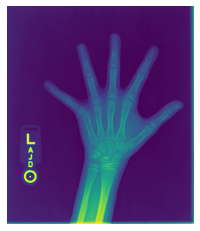

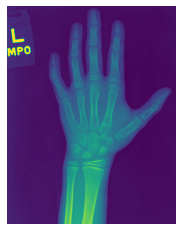

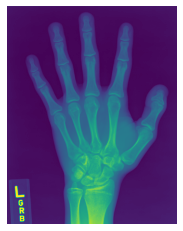

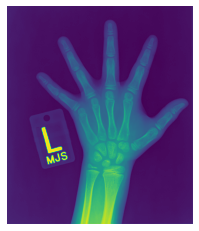

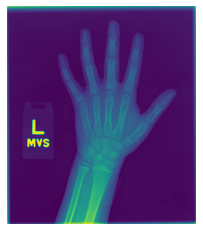

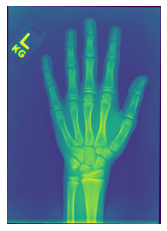

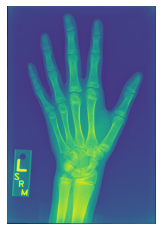

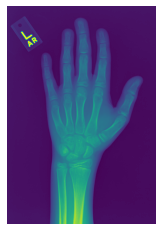

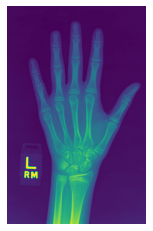

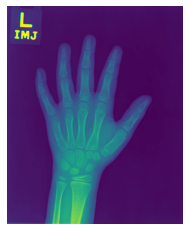

In [11]:
import matplotlib.image as mpimg #นำเข้า library ที่ใช้อ่านรูป
for filename, boneage, gender in train_dataset[['id','boneage','male']].sample(10).values: #เป็นคำสั่งวนลูปเพื่อแสดงภาพ และข้อมูลของภาพที่เก็บไว้ใน Train_df (ชื่อ อายุ เพศ)
    img_train = mpimg.imread(os.path.join(path,'boneage_training_dataset/')+ filename) # เป็นคำสั่งที่ใช้ในการนำรูปเข้ามา
    plt.imshow(img_train) # แสดงรูปภาพ
    #plt.title('Image name:{}  Bone age: {} years  Gender: {}'.format(filename, boneage/12, gender)) # แสดงหัวเรื่องโดยบอกถึง ชื่อ อายุ(ปี) และเพศ ของแต่ละภาพ
    plt.axis('off')
    plt.show()

In [12]:
img_train

array([[0.16862746, 0.15294118, 0.13725491, ..., 0.05490196, 0.05490196,
        0.05490196],
       [0.16862746, 0.15294118, 0.13725491, ..., 0.05098039, 0.05098039,
        0.05490196],
       [0.16862746, 0.15294118, 0.14117648, ..., 0.05490196, 0.05098039,
        0.05098039],
       ...,
       [0.2901961 , 0.29803923, 0.29411766, ..., 0.05882353, 0.0627451 ,
        0.0627451 ],
       [0.30980393, 0.31764707, 0.31764707, ..., 0.05490196, 0.05882353,
        0.05882353],
       [0.33333334, 0.3372549 , 0.3372549 , ..., 0.0627451 , 0.05882353,
        0.05490196]], dtype=float32)

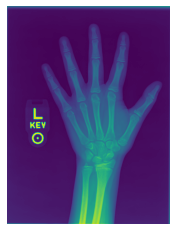

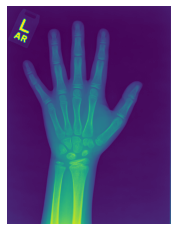

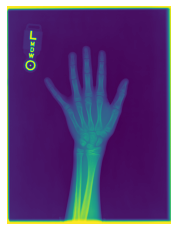

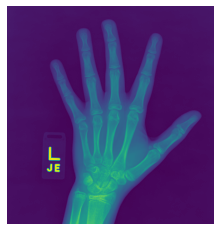

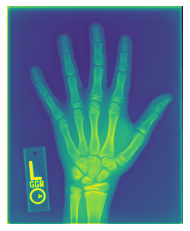

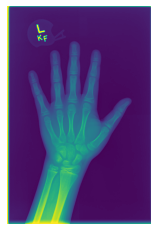

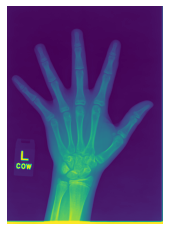

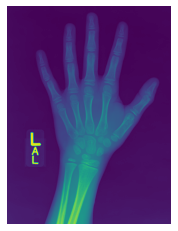

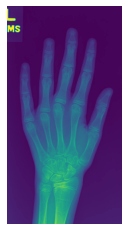

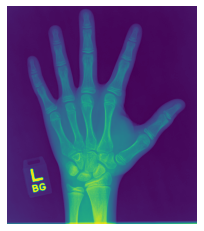

In [13]:
import matplotlib.image as mpimg #นำเข้า library ที่ใช้อ่านรูป
for filename, boneage, gender in validation_dataset[['id','boneage','male']].sample(10).values: #เป็นคำสั่งวนลูปเพื่อแสดงภาพ และข้อมูลของภาพที่เก็บไว้ใน Train_df (ชื่อ อายุ เพศ)
    img_val = mpimg.imread(os.path.join(path,'boneage_validation_dataset/')+ filename) # เป็นคำสั่งที่ใช้ในการนำรูปเข้ามา
    plt.imshow(img_val) # แสดงรูปภาพ
    #plt.title('Image name:{}  Bone age: {} years  Gender: {}'.format(filename, boneage/12, gender)) # แสดงหัวเรื่องโดยบอกถึง ชื่อ อายุ(ปี) และเพศ ของแต่ละภาพ
    plt.axis('off')
    plt.show()

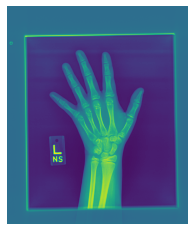

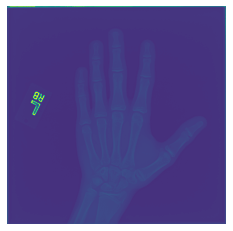

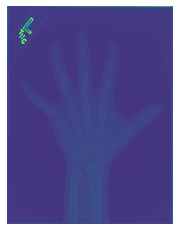

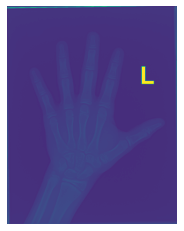

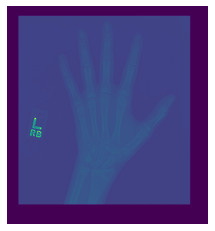

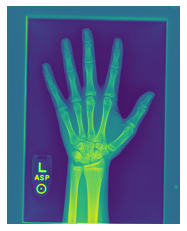

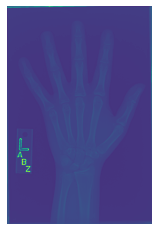

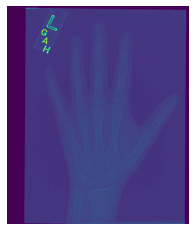

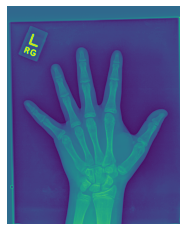

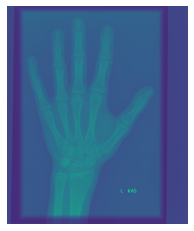

In [14]:
import matplotlib.image as mpimg #นำเข้า library ที่ใช้อ่านรูป
for filename, gender in test_dataset[['id','Sex']].sample(10).values: #เป็นคำสั่งวนลูปเพื่อแสดงภาพ และข้อมูลของภาพที่เก็บไว้ใน Train_df (ชื่อ อายุ เพศ)
    img_test = mpimg.imread(os.path.join(path,'boneage-test-dataset/')+ filename) # เป็นคำสั่งที่ใช้ในการนำรูปเข้ามา
    plt.imshow(img_test) # แสดงรูปภาพ
    #plt.title('Image name:{}  Bone age: {} years  Gender: {}'.format(filename, boneage/12, gender)) # แสดงหัวเรื่องโดยบอกถึง ชื่อ อายุ(ปี) และเพศ ของแต่ละภาพ
    plt.axis('off')
    plt.show()

In [15]:
num_classes=1

In [16]:
# Dataloaders
train_transform = transforms.Compose([transforms.Resize((500, 500)),
                               transforms.RandomAffine(
                                   20, translate=(0.2, 0.2),
                                   scale=(1, 1.2)),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor()])

val_transform = transforms.Compose([transforms.Resize((500, 500)),
                               transforms.ToTensor()])

In [17]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.max_pool1(out)
        
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [18]:
model = ConvNeuralNet(num_classes=1)

In [19]:
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, weight_decay = 0.005, momentum = 0.9)  

total_step = len(img_train)

In [20]:
total_step

1403

In [22]:
num_epochs = 20

In [23]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (filename, boneage, gender) in enumerate(img_train):  
        # Move tensors to the configured device
        filename = filename.to(device)
        boneage = boneage.to(device)
        gender = gender.to(device)
        # Forward pass
        outputs = model(filename)
        loss = criterion(outputs,boneage,gender)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

            
            

ValueError: ignored